In [2]:
import numpy as np
import random

from trmf import trmf
from synthetic_data import SyntheticData

import matplotlib.pyplot as plt
%matplotlib inline

# Experiments on synthetic data

Generate several timeseries.

In [3]:
N = 16
T = 220
T_train = 200
T_test = 20
K = 4
lags = [1, 12, 24]
L = len(lags)
sigma_w = 0.5
sigma_x = 0.1
sigma_t = 0.0

sd = SyntheticData(N, T, K, lags, sigma_w, sigma_x, sigma_t)

In [4]:
sd.synthesize_data()
data = sd.get_data()

Visualise one of timeseries.

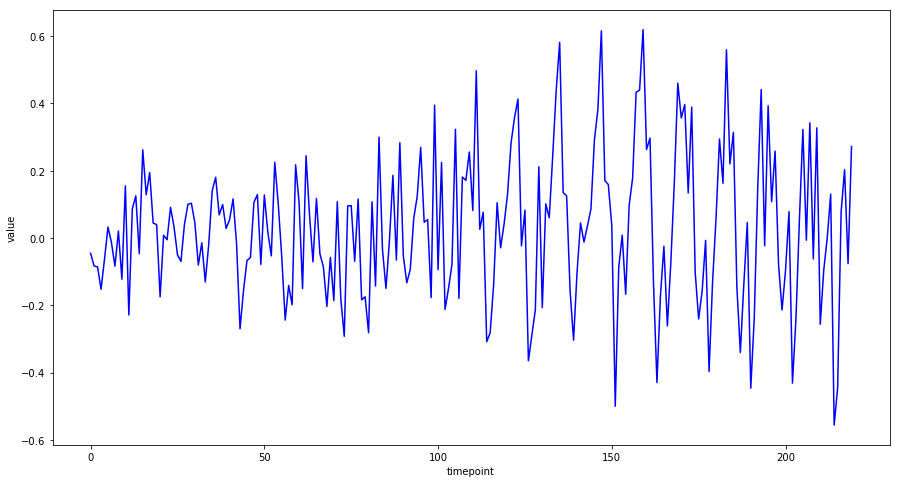

In [6]:
plt.figure(figsize=(15,8))
plt.plot(data[0], color='blue')

plt.xlabel('timepoint')
plt.ylabel('value')

plt.show()

Split data in two sets for training and validation.

In [8]:
train = data[:, :T_train]
test = data[:, T_train:]

For the estimation we will use normalised deviation.

In [9]:
def normalized_deviation(prediction, Y):
    return abs(prediction - Y).sum() / abs(Y).sum()

Lets learn the model with same parameters as the original data has.

In [10]:
lambda_f = 2.
lambda_x = 2.
lambda_w = 2.
lags = [1, 12, 24]
eta = 1.
step = 0.0001
alpha = 1000.

model = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta)

Fit the model on training data.

In [19]:
model.fit(train, max_iter=10000)

Plot the result.

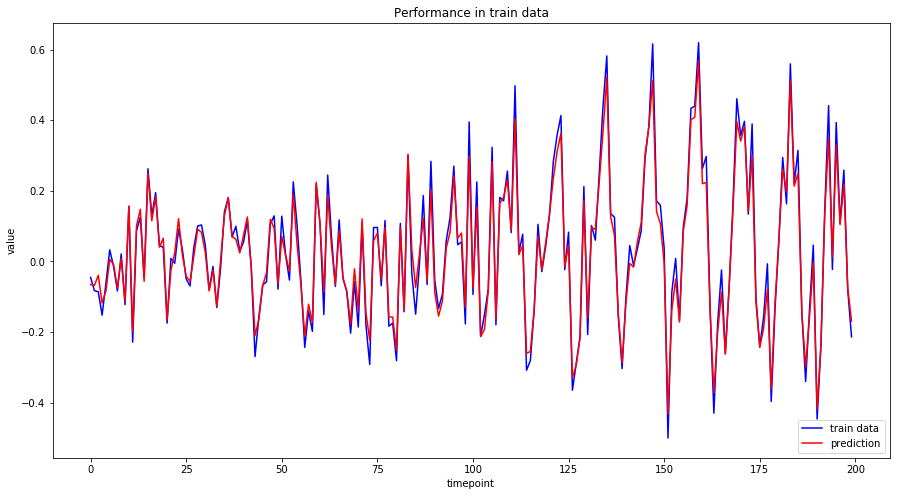

Normalized deviation =  0.36258080495585765


In [20]:
train_preds = np.dot(model.F, model.X)

plt.figure(figsize=(15,8))
plt.plot(train[0], label='train data', color='blue')
plt.plot(train_preds[0], label='prediction', color='red')

plt.title('Performance in train data')
plt.xlabel('timepoint')
plt.ylabel('value')

plt.legend(loc=4)
plt.show()

print('Normalized deviation = ', normalized_deviation(train_preds, train))

Now let's look on the performance on test data.

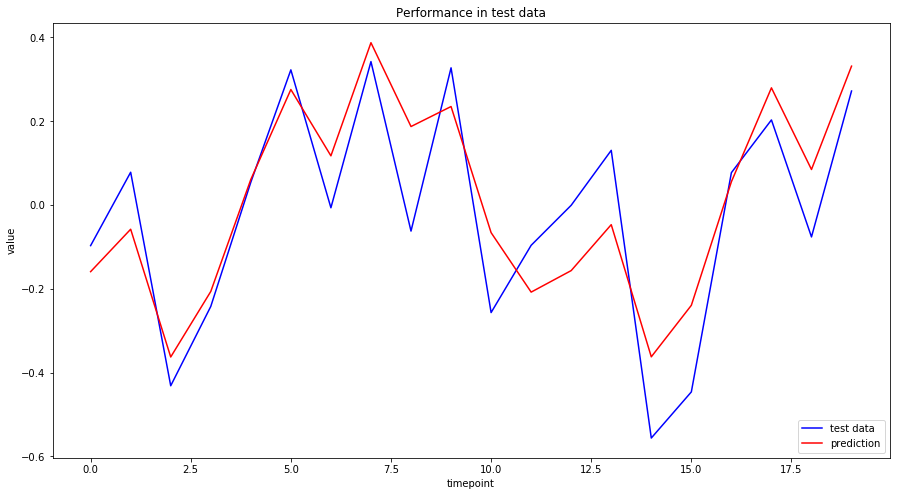

Normalized deviation =  0.6580759353919189


In [21]:
test_preds = model.predict(T_test)

plt.figure(figsize=(15,8))
plt.plot(test[0], label='test data', color='blue')
plt.plot(test_preds[0], label='prediction', color='red')

plt.title('Performance in test data')
plt.xlabel('timepoint')
plt.ylabel('value')

plt.legend(loc=4)
plt.show()

print('Normalized deviation = ', normalized_deviation(test_preds, test))

So model converged right way. Now we will look at the train/test performance depending on number of iterations.

In [28]:
train_error = []
test_error = []
model.fit(train, max_iter=0)

for _ in range(100000):
    model.fit(train, max_iter=1, resume=True)
    train_preds = np.dot(model.F, model.X)
    train_error.append(normalized_deviation(train_preds, train))

    test_preds = model.predict(T_test)
    test_error.append(normalized_deviation(test_preds, test))


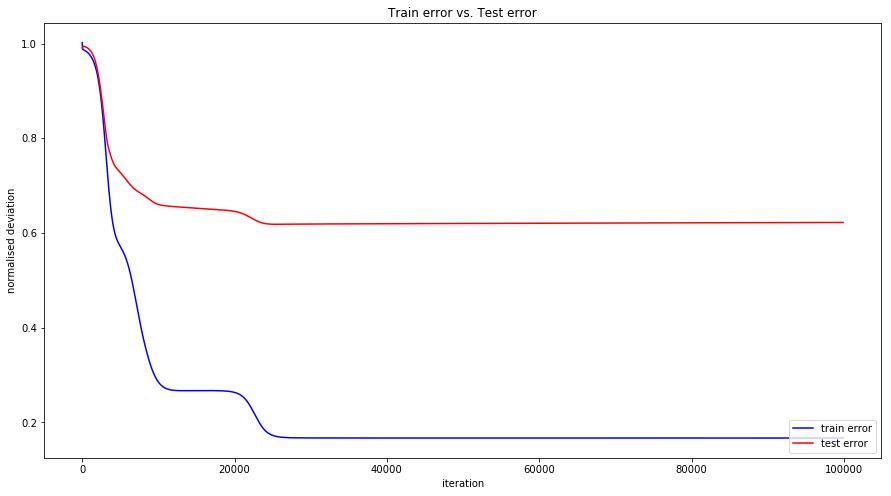

In [29]:
plt.figure(figsize=(15,8))
plt.plot(train_error[100:], label='train error', color='blue')
plt.plot(test_error[100:], label='test error', color='red')

plt.title('Train error vs. Test error')
plt.xlabel('iteration')
plt.ylabel('normalised deviation')

plt.legend(loc=4)
plt.show()

What if the model takes into account only one lag.

In [36]:
lambda_f = 2.
lambda_x = 2.
lambda_w = 2.
lags = [1]
eta = 1.
step = 0.0001
alpha = 1000.

model2 = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta)

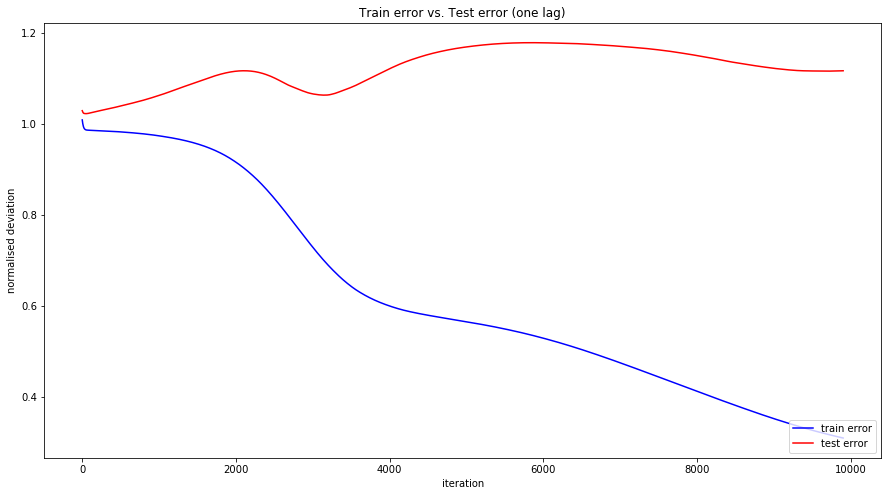

In [37]:
train_error = []
test_error = []
model2.fit(train, max_iter=0)

for _ in range(10000):
    model2.fit(train, max_iter=1, resume=True)
    train_preds = np.dot(model2.F, model2.X)
    train_error.append(normalized_deviation(train_preds, train))

    test_preds = model2.predict(T_test)
    test_error.append(normalized_deviation(test_preds, test))

plt.figure(figsize=(15,8))
plt.plot(train_error[100:], label='train error', color='blue')
plt.plot(test_error[100:], label='test error', color='red')

plt.title('Train error vs. Test error (one lag)')
plt.xlabel('iteration')
plt.ylabel('normalised deviation')

plt.legend(loc=4)
plt.show()

Two lags?

In [38]:
lambda_f = 2.
lambda_x = 2.
lambda_w = 2.
lags = [1, 12]
eta = 1.
step = 0.0001
alpha = 1000.

model2 = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta)

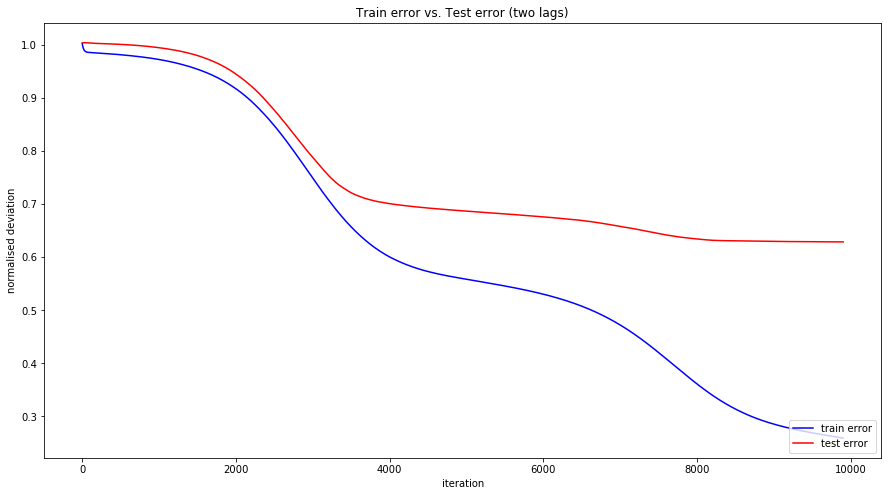

In [39]:
train_error = []
test_error = []
model2.fit(train, max_iter=0)

for _ in range(10000):
    model2.fit(train, max_iter=1, resume=True)
    train_preds = np.dot(model2.F, model2.X)
    train_error.append(normalized_deviation(train_preds, train))

    test_preds = model2.predict(T_test)
    test_error.append(normalized_deviation(test_preds, test))

plt.figure(figsize=(15,8))
plt.plot(train_error[100:], label='train error', color='blue')
plt.plot(test_error[100:], label='test error', color='red')

plt.title('Train error vs. Test error (two lags)')
plt.xlabel('iteration')
plt.ylabel('normalised deviation')

plt.legend(loc=4)
plt.show()

Two lags, but not the same?

In [40]:
lambda_f = 2.
lambda_x = 2.
lambda_w = 2.
lags = [1, 10]
eta = 1.
step = 0.0001
alpha = 1000.

model2 = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta)

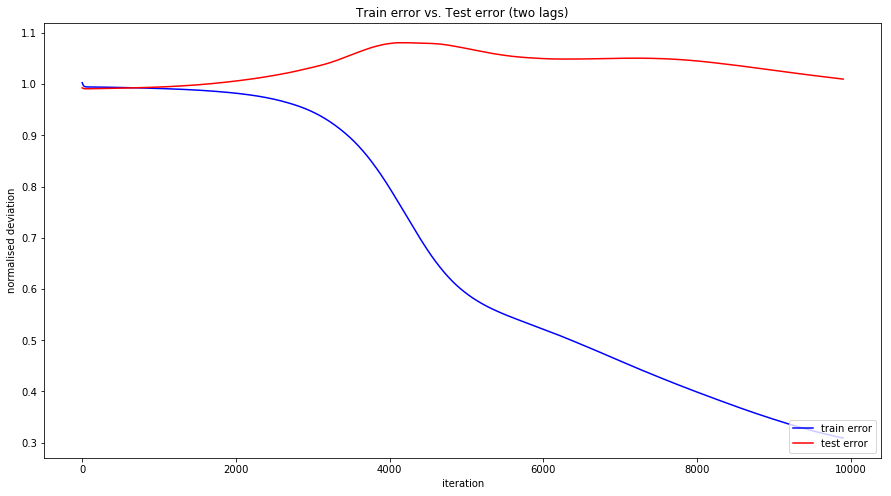

In [41]:
train_error = []
test_error = []
model2.fit(train, max_iter=0)

for _ in range(10000):
    model2.fit(train, max_iter=1, resume=True)
    train_preds = np.dot(model2.F, model2.X)
    train_error.append(normalized_deviation(train_preds, train))

    test_preds = model2.predict(T_test)
    test_error.append(normalized_deviation(test_preds, test))

plt.figure(figsize=(15,8))
plt.plot(train_error[100:], label='train error', color='blue')
plt.plot(test_error[100:], label='test error', color='red')

plt.title('Train error vs. Test error (two lags)')
plt.xlabel('iteration')
plt.ylabel('normalised deviation')

plt.legend(loc=4)
plt.show()